In [1]:
import pandas as pd



In [3]:
df = pd.read_csv("Video_Games_Sales_with_Ratings.csv", on_bad_lines='skip')


In [4]:
print(df.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating;

In [5]:
print(df.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating;'],
      dtype='object')


In [6]:
print(df.isnull().sum())


Name                  2
Platform            535
Year_of_Release     791
Genre               537
Publisher           587
NA_Sales            535
EU_Sales            535
JP_Sales            535
Other_Sales         535
Global_Sales        535
Critic_Score       8926
Critic_Count       8926
User_Score         7152
User_Count         9462
Developer          7076
Rating;             557
dtype: int64


In [7]:
print(df.dtypes)


Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating;             object
dtype: object


In [9]:
import numpy as np

df['User_Score'] = df['User_Score'].replace('tbd', np.nan).astype(float)


In [10]:
df = df.dropna(subset=['Year_of_Release'])
df['Year_of_Release'] = df['Year_of_Release'].astype(int)


In [11]:
df['Rating;'] = df['Rating;'].str.strip(';').str.strip()


In [12]:
df = df.dropna(subset=['Platform', 'Genre', 'Publisher'])


In [13]:
print(df.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii             2006        Sports  Nintendo   
1         Super Mario Bros.      NES             1985      Platform  Nintendo   
2            Mario Kart Wii      Wii             2008        Racing  Nintendo   
3         Wii Sports Resort      Wii             2009        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count Developer Rating

In [14]:
print(df['User_Score'].isna().sum())


8761


In [15]:
print(df['User_Score'].dtype)


float64


In [16]:
print(df.describe())


       Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     15786.000000  15786.000000  15786.000000  15786.000000   
mean       2006.387939      0.263326      0.144970      0.079750   
std           5.921278      0.823224      0.507075      0.315687   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count   User_Score  \
count  15786.000000  15786.000000   7538.000000   7538.000000  7025.000000   
mean       0.047140      0.535438     69.109445     26.261741     7.143616   
std        0.188989      1.567763     13.904032     18.939954     1.494039   
min        0.000000      0.010000     17.000000      3.000000     0.000000 

In [17]:
print(df[['Name', 'User_Score']].head(10))


                        Name  User_Score
0                 Wii Sports         8.0
1          Super Mario Bros.         NaN
2             Mario Kart Wii         8.3
3          Wii Sports Resort         8.0
4   Pokemon Red/Pokemon Blue         NaN
5                     Tetris         NaN
6      New Super Mario Bros.         8.5
7                   Wii Play         6.6
8  New Super Mario Bros. Wii         8.4
9                  Duck Hunt         NaN


In [18]:
df['User_Score'] = df.groupby('Genre')['User_Score'].transform(lambda x: x.fillna(x.median()))


In [19]:
df['User_Score'] = df['User_Score'].fillna(df['User_Score'].median())


In [20]:
print(df['User_Score'].isna().sum())


0


In [21]:
print("Eksik Year_of_Release sayısı:", df['Year_of_Release'].isna().sum())


Eksik Year_of_Release sayısı: 0


In [22]:
platform_year_median = df.groupby('Platform')['Year_of_Release'].median()


In [23]:
def fill_year(row):
    if pd.isna(row['Year_of_Release']):
        return platform_year_median.get(row['Platform'], df['Year_of_Release'].median())
    else:
        return row['Year_of_Release']

df['Year_of_Release'] = df.apply(fill_year, axis=1)

In [24]:
print("Eksik Year_of_Release sayısı doldurulduktan sonra:", df['Year_of_Release'].isna().sum())


Eksik Year_of_Release sayısı doldurulduktan sonra: 0


In [25]:
median_scores = df.groupby(['Platform', 'Genre'])['Critic_Score'].median()


In [26]:
def fill_critic_score(row):
    if pd.isna(row['Critic_Score']):
        median = median_scores.get((row['Platform'], row['Genre']), np.nan)
        if not pd.isna(median):
            return median
        # Platform-Genre medyanı yoksa platform medyanını deneyelim
        platform_median = df[df['Platform'] == row['Platform']]['Critic_Score'].median()
        if not pd.isna(platform_median):
            return platform_median
        # Son çare genel medyan
        return df['Critic_Score'].median()
    else:
        return row['Critic_Score']


In [ ]:
df['Critic_Score'] = df.apply(fill_critic_score, axis=1)


In [28]:
# Platform ve Genre bazında Critic_Score medyanlarını hesapla
median_scores = df.groupby(['Platform', 'Genre'])['Critic_Score'].median()

def fill_critic_score(row):
    if pd.isna(row['Critic_Score']):
        median = median_scores.get((row['Platform'], row['Genre']), np.nan)
        if not pd.isna(median):
            return median
        # Platform-Genre medyanı yoksa platform medyanını deneyelim
        platform_median = df[df['Platform'] == row['Platform']]['Critic_Score'].median()
        if not pd.isna(platform_median):
            return platform_median
        # Son çare genel medyan
        return df['Critic_Score'].median()
    else:
        return row['Critic_Score']

df['Critic_Score'] = df.apply(fill_critic_score, axis=1)

# Kontrol
print("Eksik Critic_Score sayısı:", df['Critic_Score'].isna().sum())


Eksik Critic_Score sayısı: 0


Matplotlib is building the font cache; this may take a moment.


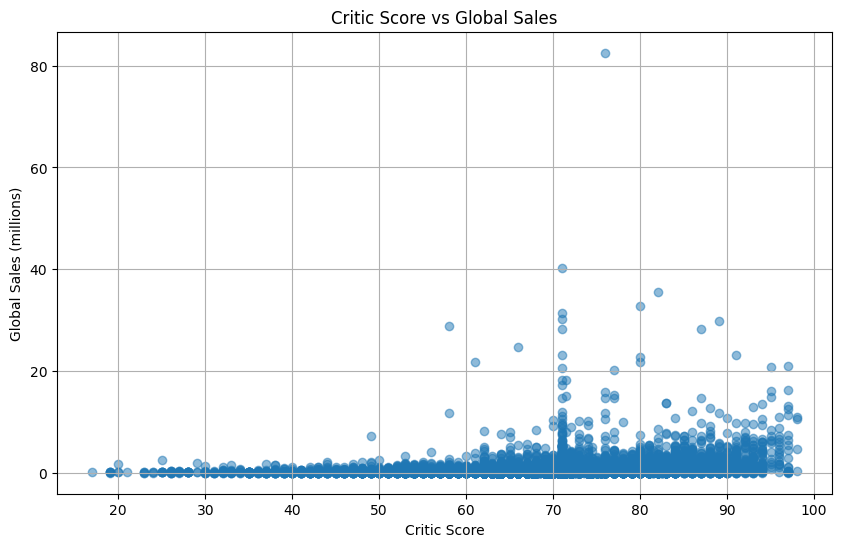

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Critic_Score'], df['Global_Sales'], alpha=0.5)
plt.title('Critic Score vs Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.show()


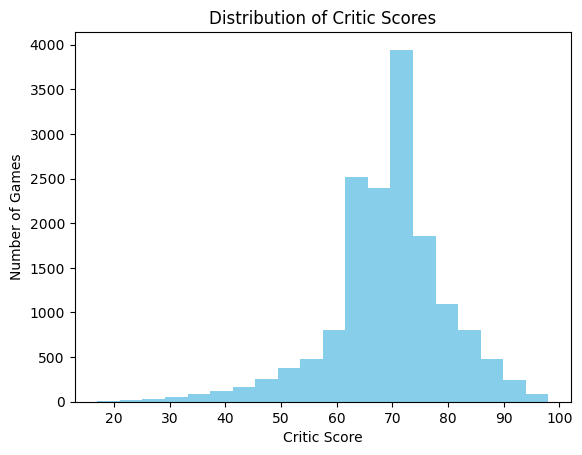

In [35]:
plt.hist(df['Critic_Score'], bins=20, color='skyblue')
plt.title('Distribution of Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('Number of Games')
plt.show()


In [36]:
corr = df['Critic_Score'].corr(df['Global_Sales'])
print(f"Korelasyon: {corr:.2f}")


Korelasyon: 0.20


In [ ]:
import pandas as pd

data = {
    'Oyun Adı': [
        'God of War (2018)',
        'God of War Ragnarok (2022)',
        'Red Dead Redemption',
        'Red Dead Redemption 2',
        'GTA 5',
        'FIFA 20',
        'Cyberpunk 2077',
        'Call of Duty: Modern Warfare (2019)',
        'The Witcher 3',
        'No Man\'s Sky',
        'It Takes Two'
    ],
    'Critic Score': [94, 91, 95, 97, 97, 79, 86, 81, 93, 61, 88],
    'Global Sales (milyon)': [10, 5, 15, 50, 175, 30, 13, 30, 30, 5, 1.5],
}

df_games = pd.DataFrame(data)

print(df_games)


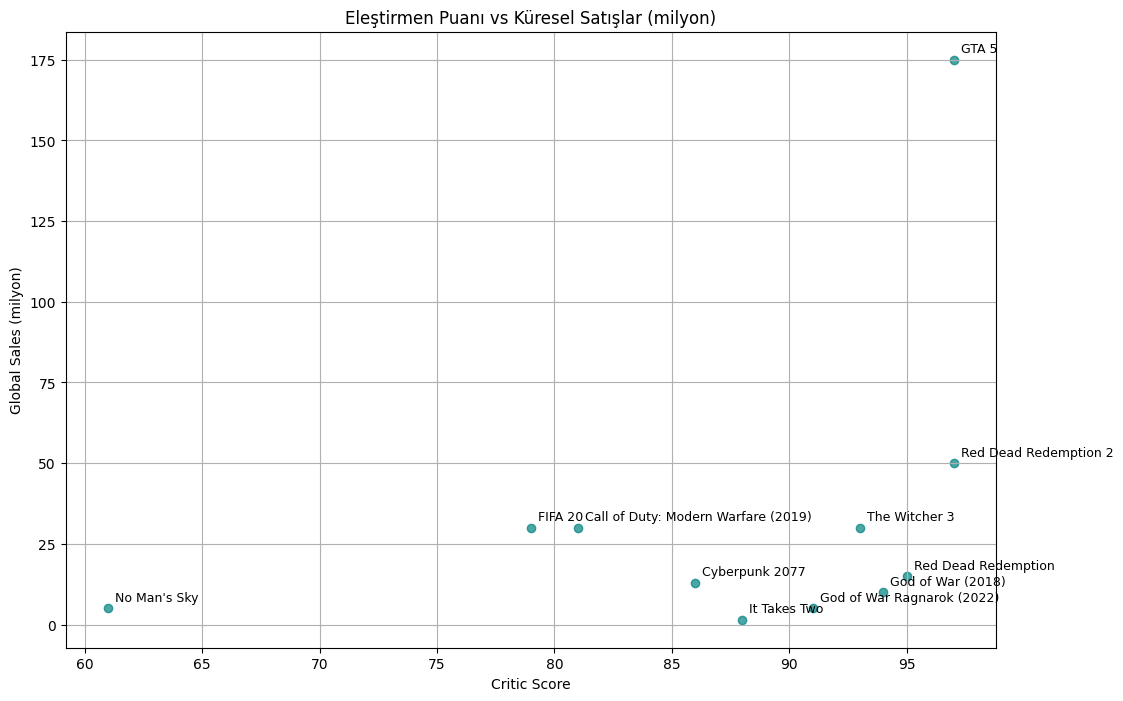

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(df_games['Critic Score'], df_games['Global Sales (milyon)'], color='teal', alpha=0.7)

for i, oyun in df_games.iterrows():
    plt.annotate(oyun['Oyun Adı'], 
                 (oyun['Critic Score'], oyun['Global Sales (milyon)']),
                 textcoords="offset points", xytext=(5,5), ha='left', fontsize=9)

plt.title('Eleştirmen Puanı vs Küresel Satışlar (milyon)')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (milyon)')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Önceki birleşik tablo
data = {
    'Oyun Adı': [
        'God of War (2018)', 'God of War Ragnarok (2022)', 'Red Dead Redemption',
        'Red Dead Redemption 2', 'GTA 5', 'FIFA 20', 'Cyberpunk 2077',
        'Call of Duty: Modern Warfare (2019)', 'The Witcher 3', 'No Man\'s Sky',
        'It Takes Two', 'GTA 3', 'GTA 4'
    ],
    'Critic Score': [94, 91, 95, 97, 97, 79, 86, 81, 93, 61, 88, 97, 87],
    'Global Sales (milyon)': [10, 5, 15, 50, 175, 30, 13, 30, 30, 5, 1.5, 14, 25],
    'Notlar': [
        'Yüksek puan, güçlü hikaye ve pazarlama ile satış başarısı',
        'Serinin devamı, yüksek puan, güçlü satış performansı',
        'İlk oyun, yüksek eleştirmen puanı, sağlam satış',
        'En yüksek puanlardan, büyük pazarlama bütçesi ve sadık kitle',
        'Çok yüksek satış, marka etkisi ve geniş oyuncu kitlesi',
        'Orta puan, marka gücü ve her yıl çıkan seri etkisi',
        'Yüksek beklenti ve reklam, teknik sorunlara rağmen satış',
        'Orta-yüksek puan, marka sadakati ve geniş oyuncu kitlesi',
        'Eleştirmen ve oyuncu beğenisi, uzun soluklu satış',
        'Düşük puan, erken hayal kırıklığı ama zamanla yükselen satış',
        'Yüksek puan, niş tür, beklenen kadar yüksek satış değil',
        'Serinin ilk büyük başarısı, yeni nesil oyun deneyimi',
        'Önceki oyunun devamı, büyük pazarlama ve iyileştirmeler'
    ]
}

df_all = pd.DataFrame(data)


colors = ['red' if x in ['GTA 3', 'GTA 4'] else 'blue' for x in df_all['Oyun Adı']]

plt.figure(figsize=(12, 7))
plt.scatter(df_all['Critic Score'], df_all['Global Sales (milyon)'], c=colors, s=100, alpha=0.7)

for i, row in df_all.iterrows():
    plt.text(row['Critic Score'] + 0.5, row['Global Sales (milyon)'], row['Oyun Adı'], fontsize=9)

plt.title('Oyunların Kritik Puanları ve Satışları')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (milyon)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("Video_Games_Sales_with_Ratings.csv", on_bad_lines='skip')
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
if df['User_Score'].max() <= 10:
    df['User_Score'] = df['User_Score'] * 10
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')


subset = df[['Critic_Score', 'Global_Sales']].dropna()


plt.figure(figsize=(8,6))
plt.scatter(subset['Critic_Score'], subset['Global_Sales'], alpha=0.5, edgecolors='w', s=50)
plt.title('Critic Score ile Global Sales Arasındaki İlişki')
plt.xlabel('Critic Score (100 üzerinden)')
plt.ylabel('Global Sales (Milyonlar)')
plt.grid(True)
plt.show()


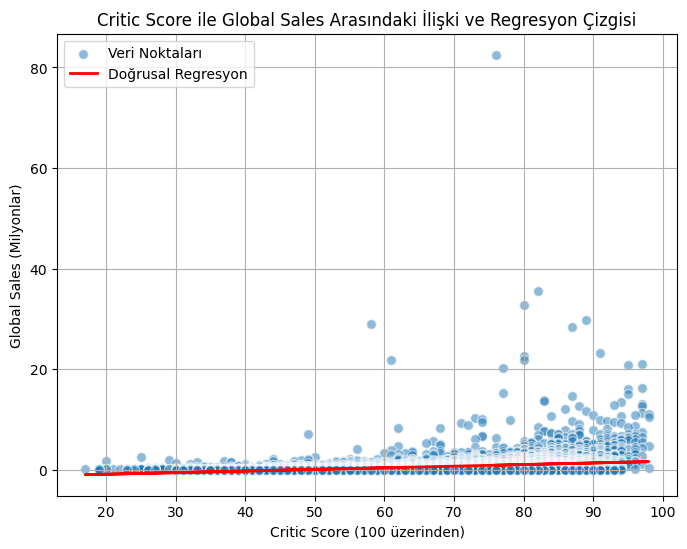

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veriyi oku ve işle
df = pd.read_csv("Video_Games_Sales_with_Ratings.csv", on_bad_lines='skip')
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
if df['User_Score'].max() <= 10:
    df['User_Score'] = df['User_Score'] * 10
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

subset = df[['Critic_Score', 'Global_Sales']].dropna()

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(subset['Critic_Score'], subset['Global_Sales'], alpha=0.5, edgecolors='w', s=50, label='Veri Noktaları')

# Doğrusal regresyon hesapla
x = subset['Critic_Score']
y = subset['Global_Sales']
coefficients = np.polyfit(x, y, 1)  # 1. dereceden polinom = doğrusal
poly_eqn = np.poly1d(coefficients)
y_hat = poly_eqn(x)

# Regresyon çizgisini çiz
plt.plot(x, y_hat, color='red', linewidth=2, label='Doğrusal Regresyon')

plt.title('Critic Score ile Global Sales Arasındaki İlişki ve Regresyon Çizgisi')
plt.xlabel('Critic Score (100 üzerinden)')
plt.ylabel('Global Sales (Milyonlar)')
plt.legend()
plt.grid(True)
plt.show()


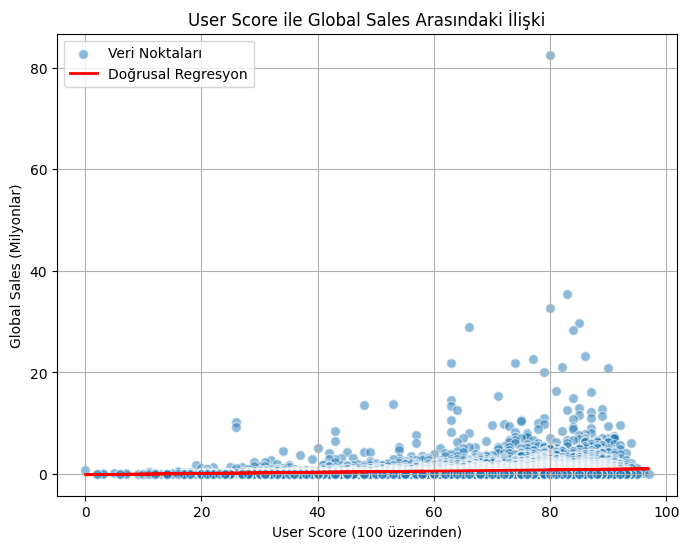

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veriyi oku ve işle
df = pd.read_csv("Video_Games_Sales_with_Ratings.csv", on_bad_lines='skip')

# User_Score 'tbd' olanları NaN yap, sonra float çevir
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# User_Score genelde 0-10 arasında, 100'e çekmek için 10 ile çarpabiliriz
if df['User_Score'].max() <= 10:
    df['User_Score'] = df['User_Score'] * 10

df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

subset = df[['User_Score', 'Global_Sales']].dropna()

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(subset['User_Score'], subset['Global_Sales'], alpha=0.5, edgecolors='w', s=50, label='Veri Noktaları')

# Doğrusal regresyon hesapla
x = subset['User_Score']
y = subset['Global_Sales']
coefficients = np.polyfit(x, y, 1)  # 1. dereceden polinom
poly_eqn = np.poly1d(coefficients)
y_hat = poly_eqn(x)

# Regresyon çizgisini çiz
plt.plot(x, y_hat, color='red', linewidth=2, label='Doğrusal Regresyon')

plt.title('User Score ile Global Sales Arasındaki İlişki')
plt.xlabel('User Score (100 üzerinden)')
plt.ylabel('Global Sales (Milyonlar)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Video_Games_Sales_with_Ratings.csv", on_bad_lines='skip')

df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

if df['User_Score'].max() <= 10:
    df['User_Score'] = df['User_Score'] * 10

df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

subset = df[['User_Score', 'Global_Sales']].dropna()

plt.figure(figsize=(8,6))
plt.scatter(subset['User_Score'], subset['Global_Sales'], alpha=0.5, edgecolors='w', s=50, label='Data Points')

x = subset['User_Score']
y = subset['Global_Sales']
coefficients = np.polyfit(x, y, 1)  # 1st degree polynomial = linear fit
poly_eqn = np.poly1d(coefficients)
y_hat = poly_eqn(x)

plt.plot(x, y_hat, color='red', linewidth=2, label='Linear Regression')

plt.title('Relationship Between User Score and Global Sales')
plt.xlabel('User Score (out of 100)')
plt.ylabel('Global Sales (Millions)')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
correlation = subset['User_Score'].corr(subset['Global_Sales'])
print(f"Pearson correlation between User Score and Global Sales: {correlation:.3f}")


Pearson correlation between User Score and Global Sales: 0.095


In [1]:
import pandas as pd
import numpy as np

# Veriyi oku ve işle
df = pd.read_csv("Video_Games_Sales_with_Ratings.csv", on_bad_lines='skip')

# Kritik skor ve satışları sayıya çevir, NaN değerleri temizle
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

# Boş değerleri düşürelim
df_clean = df.dropna(subset=['Genre', 'Critic_Score', 'Global_Sales'])

# Türlere göre grupla ve her grup için korelasyonu hesapla
genres = df_clean['Genre'].unique()

print("Correlation between Critic Score and Global Sales by Genre:\n")
for genre in genres:
    subset = df_clean[df_clean['Genre'] == genre]
    if len(subset) > 1:  # Korelasyon için en az 2 veri olmalı
        corr = subset['Critic_Score'].corr(subset['Global_Sales'])
        print(f"{genre}: {corr:.3f}")
    else:
        print(f"{genre}: Not enough data")


Correlation between Critic Score and Global Sales by Genre:

Sports: 0.130
Racing: 0.250
Platform: 0.281
Misc: 0.099
Action: 0.397
Puzzle: 0.204
Shooter: 0.353
Fighting: 0.376
Simulation: 0.247
Role-Playing: 0.408
Adventure: 0.260
Strategy: 0.278


Matplotlib is building the font cache; this may take a moment.


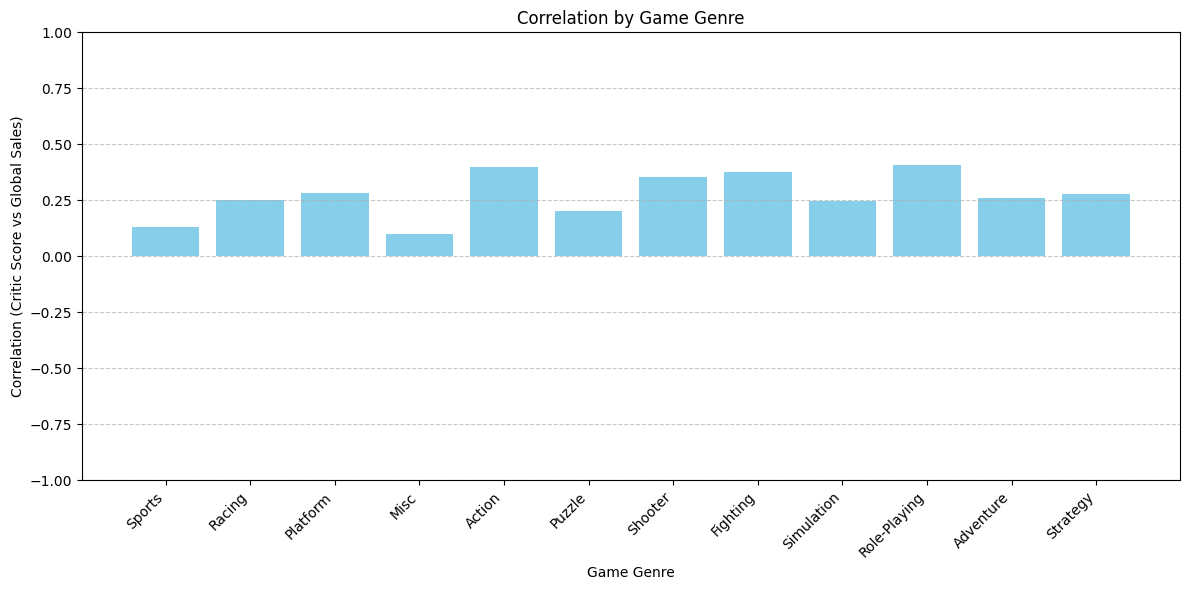

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veriyi oku ve işle
df = pd.read_csv("Video_Games_Sales_with_Ratings.csv", on_bad_lines='skip')

df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

df_clean = df.dropna(subset=['Genre', 'Critic_Score', 'Global_Sales'])

genres = df_clean['Genre'].unique()

correlations = []
genres_list = []

for genre in genres:
    subset = df_clean[df_clean['Genre'] == genre]
    if len(subset) > 1:
        corr = subset['Critic_Score'].corr(subset['Global_Sales'])
        correlations.append(corr)
        genres_list.append(genre)
    else:
        # Veri azsa NaN olarak ekleyelim
        correlations.append(np.nan)
        genres_list.append(genre)

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.bar(genres_list, correlations, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Game Genre')
plt.ylabel('Correlation (Critic Score vs Global Sales)')
plt.title('Correlation by Game Genre')
plt.ylim(-1, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Video_Games_Sales_with_Ratings.csv", on_bad_lines='skip')

df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

if df['User_Score'].max() <= 10:
    df['User_Score'] = df['User_Score'] * 10

df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

df_clean = df.dropna(subset=['Genre', 'User_Score', 'Global_Sales'])

genres = df_clean['Genre'].unique()

correlations = []
genres_list = []

for genre in genres:
    subset = df_clean[df_clean['Genre'] == genre]
    if len(subset) > 1:
        corr = subset['User_Score'].corr(subset['Global_Sales'])
        correlations.append(corr)
        genres_list.append(genre)
    else:
        correlations.append(np.nan)
        genres_list.append(genre)

plt.figure(figsize=(12, 6))
plt.bar(genres_list, correlations, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Game Genre')
plt.ylabel('Correlation (User Score vs Global Sales)')
plt.title('Correlation between User Score and Global Sales by Genre')
plt.ylim(-1, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Korelasyonları yazdırmak istersen:
for g, c in zip(genres_list, correlations):
    print(f"{g}: {c:.3f}" if not np.isnan(c) else f"{g}: Not enough data")


In [9]:
df.columns = df.columns.str.strip()


In [11]:
print(df.columns.to_list())


['game_release_date', 'sale_date', 'sales', 'release_year']


In [16]:
df = pd.read_csv("Video_Games_Sales_with_Ratings.csv", on_bad_lines='skip')


In [19]:
cod_df = df[df['Name'].str.contains("Call of Duty", na=False)]


In [20]:
cod_yearly_sales = cod_df.groupby("Year_of_Release")["Global_Sales"].sum().reset_index()


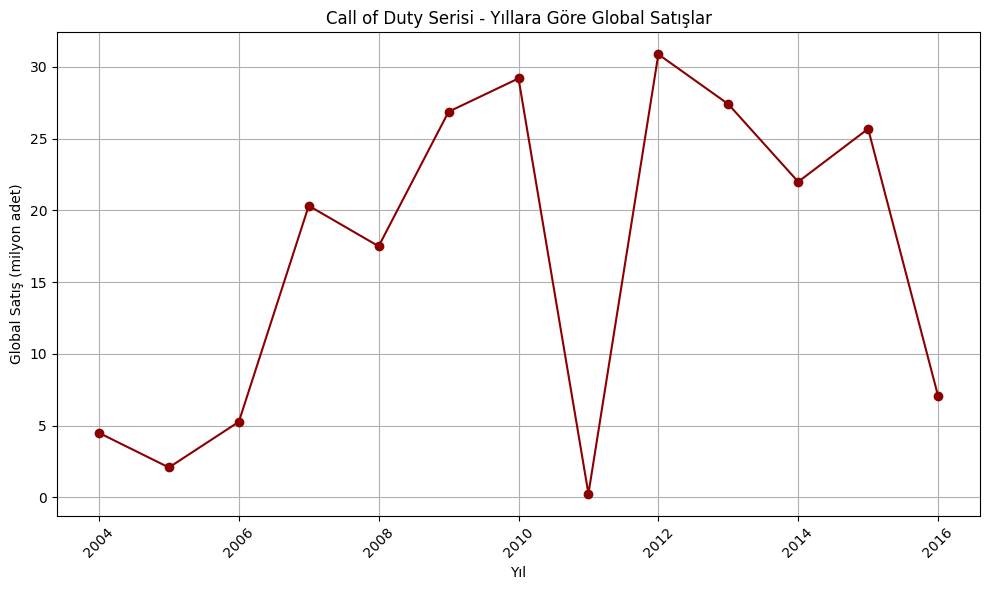

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(cod_yearly_sales["Year_of_Release"], cod_yearly_sales["Global_Sales"], marker="o", color="darkred")
plt.title("Call of Duty Serisi - Yıllara Göre Global Satışlar")
plt.xlabel("Yıl")
plt.ylabel("Global Satış (milyon adet)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
gta_df = df[df['Name'].isin(['Grand Theft Auto III', 'Grand Theft Auto IV', 'Grand Theft Auto V'])].copy()


In [23]:
cod_yearly_sales = cod_df.groupby("Year_of_Release")["Global_Sales"].sum().reset_index()


In [24]:
gta_yearly = gta_df.groupby(['Name', 'Year_of_Release'])['Global_Sales'].sum().reset_index()


In [27]:
cod_df = df[df['Name'].str.contains("Call of Duty", na=False)].copy()

cod_df["User_Score"] = pd.to_numeric(cod_df["User_Score"], errors='coerce')
cod_df["Critic_Score"] = pd.to_numeric(cod_df["Critic_Score"], errors='coerce')


In [28]:
score_cols = ["Critic_Score", "User_Score", "Global_Sales"]
cod_corr = cod_df[score_cols].corr()
print(cod_corr)


              Critic_Score  User_Score  Global_Sales
Critic_Score      1.000000    0.343589      0.369963
User_Score        0.343589    1.000000     -0.137631
Global_Sales      0.369963   -0.137631      1.000000


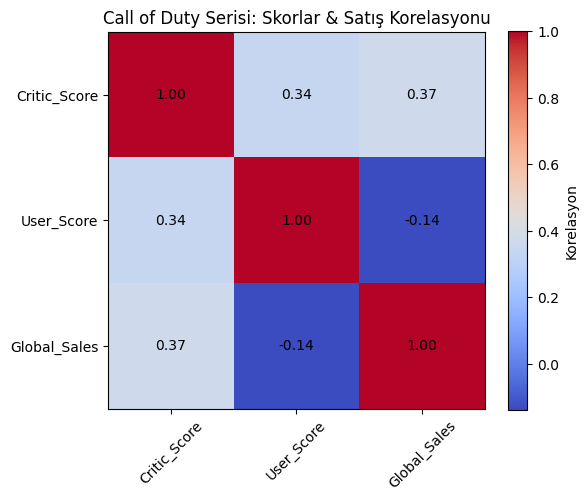

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.imshow(cod_corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label="Korelasyon")
plt.xticks(range(len(score_cols)), score_cols, rotation=45)
plt.yticks(range(len(score_cols)), score_cols)
plt.title("Call of Duty Serisi: Skorlar & Satış Korelasyonu")

# Hücrelere korelasyon değerlerini yaz
for i in range(len(score_cols)):
    for j in range(len(score_cols)):
        corr_val = cod_corr.iloc[i, j]
        plt.text(j, i, f"{corr_val:.2f}", ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt


cod_df = df[df['Name'].str.contains("Call of Duty", na=False)].copy()

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(cod_df['Critic_Score'], cod_df['Global_Sales'], alpha=0.7, color='blue')
plt.title('Call of Duty: Critic Score vs Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (Milyon)')
plt.grid(True)

plt.subplot(1, 2, 2)
cod_df['User_Score'] = pd.to_numeric(cod_df['User_Score'], errors='coerce')

plt.scatter(cod_df['User_Score'], cod_df['Global_Sales'], alpha=0.7, color='green')
plt.title('Call of Duty: User Score vs Global Sales')
plt.xlabel('User Score')
plt.ylabel('Global Sales (Milyon)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Call of Duty serisi verisi
cod_df = df[df['Name'].str.contains("Call of Duty", na=False)].copy()

# User_Score'u numeric yapalım
cod_df['User_Score'] = pd.to_numeric(cod_df['User_Score'], errors='coerce')

plt.figure(figsize=(12,5))

# Critic Score vs Global Sales
plt.subplot(1, 2, 1)
plt.scatter(cod_df['Critic_Score'], cod_df['Global_Sales'], alpha=0.7, color='blue')
plt.title('Call of Duty: Critic Score vs Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (Milyon)')
plt.grid(True)

mask = ~cod_df['Critic_Score'].isna() & ~cod_df['Global_Sales'].isna()
x = cod_df.loc[mask, 'Critic_Score']
y = cod_df.loc[mask, 'Global_Sales']
p = np.polyfit(x, y, 1)  
plt.plot(x, np.polyval(p, x), color='red', linewidth=2)

plt.subplot(1, 2, 2)
plt.scatter(cod_df['User_Score'], cod_df['Global_Sales'], alpha=0.7, color='green')
plt.title('Call of Duty: User Score vs Global Sales')
plt.xlabel('User Score')
plt.ylabel('Global Sales (Milyon)')
plt.grid(True)

mask = ~cod_df['User_Score'].isna() & ~cod_df['Global_Sales'].isna()
x = cod_df.loc[mask, 'User_Score']
y = cod_df.loc[mask, 'Global_Sales']
p = np.polyfit(x, y, 1)
plt.plot(x, np.polyval(p, x), color='red', linewidth=2)

plt.tight_layout()
plt.show()


In [35]:
cod_df = df[df['Name'].str.contains("call of duty", case=False, na=False)]


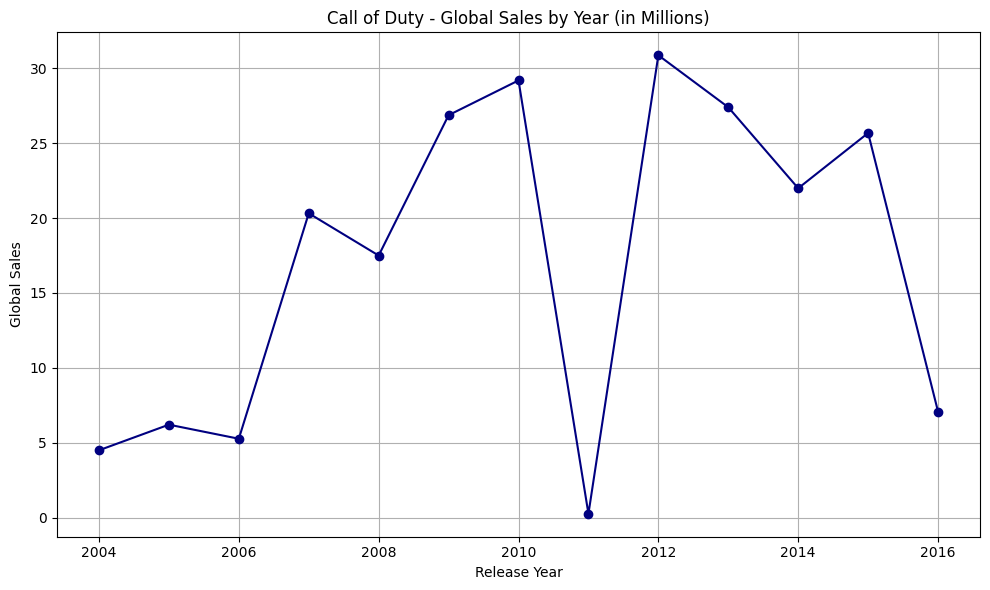

In [36]:
import matplotlib.pyplot as plt

# Group sales by year
cod_sales_by_year = cod_df.groupby("Year_of_Release")["Global_Sales"].sum().reset_index()
cod_sales_by_year = cod_sales_by_year.sort_values("Year_of_Release")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cod_sales_by_year["Year_of_Release"], cod_sales_by_year["Global_Sales"], marker='o', color='navy')
plt.title("Call of Duty - Global Sales by Year (in Millions)")
plt.xlabel("Release Year")
plt.ylabel("Global Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


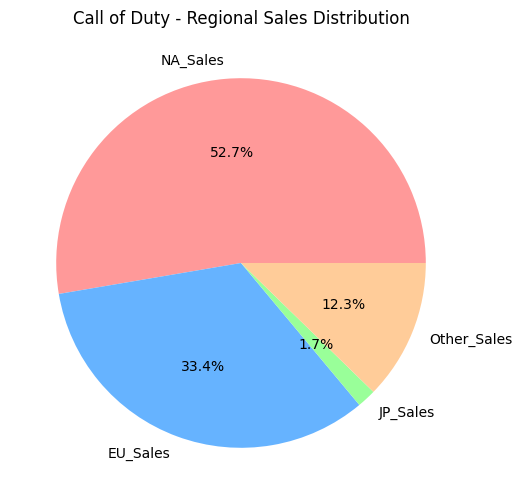

In [37]:
region_sales = cod_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Call of Duty - Regional Sales Distribution")
plt.show()


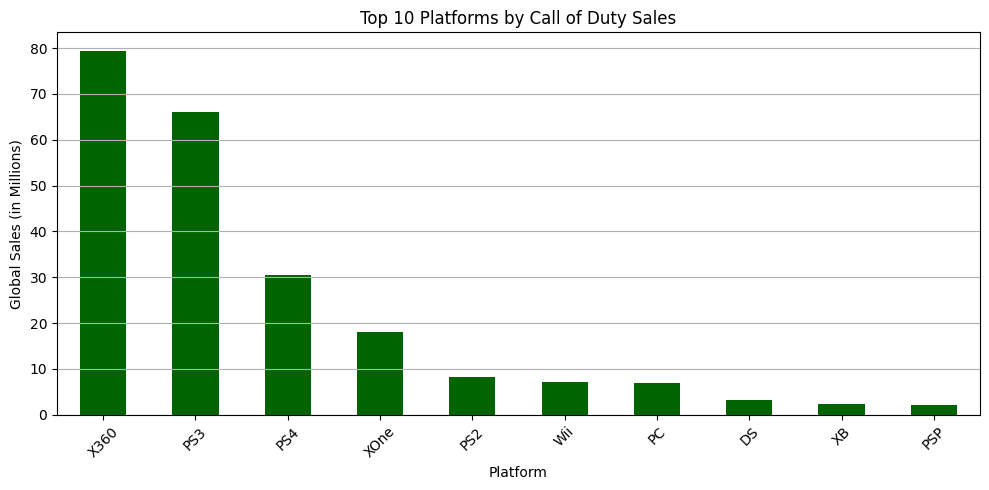

In [38]:
platform_sales = cod_df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10)
platform_sales.plot(kind='bar', figsize=(10, 5), color='darkgreen')
plt.title("Top 10 Platforms by Call of Duty Sales")
plt.xlabel("Platform")
plt.ylabel("Global Sales (in Millions)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
